In [1]:
import configparser
import random
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_auc_score, average_precision_score
from keras.models import load_model
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, Callback
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.models import load_model, Model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, \
                        Input, Dense, GlobalAveragePooling2D, Dropout
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.utils import to_categorical
from collections import Counter
import keras.optimizers
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping
from keras.utils import plot_model
import glob, os
import tensorflow as tf
import pandas as pd
from random import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import roc_auc_score, average_precision_score, mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
from pycausal import search as s
from pycausal.pycausal import pycausal as pc
from collections import defaultdict
from numpy.polynomial.polynomial import polyfit  
from scipy.stats import pearsonr
from pylab import text
from pycausal import prior as p
import itertools

# select your GPU Here
os.environ["CUDA_VISIBLE_DEVICES"]="" #Comment this line out if you want all GPUS (2 hehe)

# python full-display web browser
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


def get_model(dense, dropouts, inputs):
    # dense is an ordered list of the number of dense neurons like [1024, 2048, 1024]
    # dropouts is an ordered list of the dropout masks like [0.2, 0.3, 0.4]
    inputs = keras.Input(shape = (inputs,))
    x = keras.layers.Dense(dense[0], activation = 'relu')(inputs)
    x = keras.layers.Dropout(dropouts[0])(x, training=False)
    for den, drop in zip(dense[1:], dropouts[1:]):
        x = keras.layers.Dense(den, activation = 'relu')(x)
        x = keras.layers.Dropout(drop)(x, training=False)
    outputs = keras.layers.Dense(1, activation = 'linear')(x)
    model = keras.Model(inputs, outputs)
    return model



def get_bic(df, prior, penalty = 2):

    tetrad.run(algoId = 'fges', dfs = df,  scoreId = 'sem-bic', dataType = 'continuous',
               structurePrior = 1.0, samplePrior = 1, maxDegree = -1, maxPathLength = -1, priorKnowledge = prior,
               completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True, penalty = 200
              )

    
    BIC = tetrad.getTetradGraph().getAllAttributes().toString()
    BIC = float(BIC.split('=')[-1].split('}')[0])
    return BIC #/ len(df)

def normalize(a):
    return (a - np.min(a)) / (np.max(a) - np.min(a))
def make_categorical(df, complete_df, categoricals):   
    retval = None
    for key in df.columns:
        if retval is not None:
            if key in categoricals:
                retval = np.concatenate((retval, to_categorical(df[key], len(complete_df[key].unique()))), axis = 1)
            else:
                retval = np.concatenate((retval, df[key].values[...,np.newaxis]), axis = 1)
        else:
            if key in categoricals:
                retval = to_categorical(df[key], len(complete_df[key].unique()))
            else:
                retval = df[key]
    return retval
num_models = 50
pc = pc()
pc.start_vm(java_max_heap_size = '21000M')
tetrad = s.tetradrunner()

models = []
model_names = []



randomize = False
if randomize:
    layers = [256, 512, 1024, 2048, 4096]
    for i in range(num_models):
        network = []
        for j in range(3):
            network.append(layers[random.randint(0,len(layers) -1)])
        models.append(network)
        model_names.append('temp/sima' + str(i))
    print(models, model_names)    
else:
    model_layers = [512, 256]
    for i in range(num_models):
        models.append(model_layers)
        model_names.append('temp/sima' + str(i))

print(models, model_names)

/home/tkyono/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[[512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256]] ['temp/sima0', 'temp/sima1', 'temp/sima2', 'temp/sima3', 'temp/sima4', 'temp/sima5', 'temp/sima6', 'temp/sima7', 'temp/sima8', 'temp/sima9', 'temp/sima10', 'temp/sima11', 'temp/sima12', 'temp/sima13', 'temp/sima14', 'temp/sima15', 'temp/sima16', 'temp/sima17', 'temp/sima18', 'temp/sima19', 'temp/sima20', 'temp/sima21', 'temp/sima22', 'temp/sima23', 'temp/sima24', 'temp/sima25', 'temp/sima26', 'te

In [2]:
import networkx as nx

def random_dag(nodes, edges):
    """Generate a random Directed Acyclic Graph (DAG) with a given number of nodes and edges."""
    G = nx.DiGraph()
    for i in range(nodes):
        G.add_node(i)
    while edges > 0:
        a = random.randint(0,nodes-1)
        b=a
        while b==a:
            b = random.randint(0,nodes-1)
        G.add_edge(a,b)
        if nx.is_directed_acyclic_graph(G):
            edges -= 1
        else:
            # we closed a loop!
            G.remove_edge(a,b)
    return G



In [3]:
import pydot
from IPython.display import SVG

def examine_graph_continuous(df, prior = None):
    tetrad.run(algoId = 'fges', dfs = df,  scoreId = 'sem-bic', dataType = 'continuous',
               structurePrior = 1.0, samplePrior = 1, maxDegree = -1, maxPathLength = -1, priorKnowledge = prior,
               completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True,
               )
    return tetrad.getTetradGraph()

def gen_data(list_vertex = [], list_edges = [], mean = 0, var = 1, SIZE = 20000, perturb = []):
    g = []
    for v in list_vertex:
        if v in perturb:
            g.append(np.random.normal(mean,var,SIZE))
            print("perturbing ", v, "with meanm var = ", mean, var)
        else:
            g.append(np.random.normal(0,1,SIZE))
        
    for edge in list_edges:
        g[edge[1]] += g[edge[0]]
    g = np.swapaxes(g,0,1)
    return pd.DataFrame(g, columns = list(map(str, list_vertex)))



In [7]:

bestMSE = []
bestBIC = []
bestCOMBO = []
bestWRONG = []
bestPOSSIBLE= []
worstMSE = []
worstBIC = []
worstCOMBO = []
worstWRONG = []
worstPOSSIBLE= []

qbestMSE = []
qbestBIC = []
qbestCOMBO = []
qbestWRONG = []
qbestPOSSIBLE= []
qworstMSE = []
qworstBIC = []
qworstCOMBO = []
qworstWRONG = []
qworstPOSSIBLE= []


averageDegree = []
targetDegree = []
target_inD = []
target_outD = []
descendants = []
graphDiff = []

In [8]:
t= 0
while (t < 100):
    train_size = 10000
    nodes = 3
    test_mean = random.uniform(0.1, 1.0)
    test_var = random.uniform(1.1, 2.0)
    test_size = 2000

    while(True):
        G = random_dag(3, 3) # since max number of edges is n^2
        if (len(G.edges()) == 3):
            break
    require = []
    for i in G.edges:
        require.append([str(i[0]), str(i[1])])  
    r = random.randint(0, 3)
    print(len(require), r)
    random.shuffle(require)
    for i in range(r):
        require.pop()
    print("Removed:", r, require)

    w_prior = p.knowledge(requiredirect = require)
    
    
    df = gen_data(np.arange(nodes), G.edges, SIZE = train_size)
    require = []
    for i in G.edges:
        require.append([str(i[0]), str(i[1])])  
    prior = p.knowledge(requiredirect = require)
    examine_graph_continuous(df, prior)
    
        
    #w_G = random_dag(nodes, random.randint(0, 3)) # since max number of edges is n^2

    
    # Check to make sure that graph matches our prior knowledge. Or else abort this test.
    a = set()
    for i in tetrad.getEdges():
        a.add((i[0], i[-1]))
    b = set()
    for i in require:
        b.add((i[0], i[1]))
    print("A = ", a)
    print("B = ", b)
    if a != b:
        continue

        
    # Need to set our inputs and outputs
    inputs = set(np.arange(nodes))
    #target = str(a.pop()[random.randint(0,1)])
    target = str([x for x in G.nodes() if G.out_degree(x)==0 and G.in_degree(x)>=1][0])
    inputs.remove(int(target))
    inputs = list(map(str, inputs))
    
    perturb = int(inputs[random.randint(0,nodes - 2)])
    df_test = gen_data(np.arange(nodes), G.edges, mean = test_mean, var = test_var, SIZE = test_size, perturb = [perturb])
    sdf_test = gen_data(np.arange(nodes), G.edges, mean = random.uniform(0.01, 0.1), var = random.uniform(1.01, 1.1), SIZE = test_size, perturb = [perturb])
    target = [target]
    
    print("Inputs = ", inputs)
    print("Target = ", target)
    
    x_test = df_test[inputs]
    y_test = df_test[target]
    
    sx_test = sdf_test[inputs]
    sy_test = sdf_test[target]

    causal_split = 0.2
    val_split = 0.2
    train_split = 1 - (causal_split + val_split)

    x_causal = df[inputs][-int(causal_split * len(df)) :]
    y_causal = df[target][-int(causal_split * len(df)) :]

    x_val = df[inputs][int(train_split * len(df)):-int(causal_split * len(df))]
    y_val = df[target][int(train_split * len(df)):-int(causal_split * len(df))]

    x_train = df[inputs][:int(train_split * len(df))]
    y_train = df[target][:int(train_split * len(df))]

    verbosity = 0

    for idx, model_name in enumerate(model_names):
        if idx % 10 == 0:
            print(idx)
        if type(models[idx]) is list:
            #clear session
            keras.backend.clear_session() 
            #get model according to specification
            model = get_model(models[idx], [0.4] * len(models), np.shape(x_train)[1])
            callbacks = [ModelCheckpoint(model_name, verbose= verbosity, monitor='val_loss',save_best_only=True), 
                         EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=2, verbose= verbosity, mode='auto')]
            model.compile(optimizer = optimizers.SGD(lr = 0.0001, momentum = 0.9, ), loss='mean_squared_error', metrics = ['mse'])
            #print(len(X), len(y))
            model.fit(x_train, y_train, epochs = 20, validation_data = (x_val, y_val), callbacks = callbacks, batch_size = 32, verbose = verbosity)
        else:
            models[idx].fit(X,y)





    generalization = []
    metrics = []
    proposed = []
    w_proposed = []
    x_causal.reset_index(drop=True, inplace = True)
    for idx, model_name in enumerate(model_names):
        #print(model_name)
        if type(models[idx]) is list:
            keras.backend.clear_session()
            model = load_model(model_name)
        else:
            model = models[idx]

        y_pred = model.predict(x_test)
        generalization.append(mean_squared_error(y_pred, y_test))

        #### CHECK FOR CAUSAL METRIC HERE
        y_causal_pred = model.predict(x_causal)
        causal_targets = pd.DataFrame(y_causal_pred, columns = target)
        
        #causal_targets.reset_index(drop=True, inplace = True)
        causal_df = x_causal.join(causal_targets)



        metrics.append(mean_squared_error(y_causal_pred, y_causal))

        bic_pred = get_bic(causal_df, prior)
        proposed.append(bic_pred)
        bic_pred = get_bic(causal_df, w_prior)
        w_proposed.append(bic_pred)


    nbest = 5
    print(metrics)
    


    total = normalize(metrics) + normalize(proposed) * 1
    wrong = normalize(metrics) + normalize(w_proposed) * 1
    final = pd.DataFrame(np.stack((metrics, proposed,  total, wrong, normalize(generalization)), axis = 1), columns = ['metrics', 'proposed', 'combined', 'wrong', 'generalization'])
    print("MSE = ", np.sum(final.nsmallest(nbest, 'metrics')['generalization'].values))
    print("BIC = ", np.sum(final.nsmallest(nbest, 'proposed')['generalization'].values))
    print("COMB = ",np.sum(final.nsmallest(nbest, 'combined')['generalization'].values))
    print("WRONG = ", np.sum(final.nsmallest(nbest, 'wrong')['generalization'].values))
    print("Best possible = ",np.sum(final.nsmallest(nbest, 'generalization')['generalization'].values))
    bestMSE.append(final.nsmallest(nbest, 'metrics')['generalization'].values)
    bestBIC.append(final.nsmallest(nbest, 'proposed')['generalization'].values)
    bestCOMBO.append(final.nsmallest(nbest, 'combined')['generalization'].values)
    bestWRONG.append(final.nsmallest(nbest, 'wrong')['generalization'].values)
    bestPOSSIBLE.append(final.nsmallest(nbest, 'generalization')['generalization'].values)
    
    print("MSE = ", np.sum(final.nlargest(nbest, 'metrics')['generalization'].values))
    print("BIC = ", np.sum(final.nlargest(nbest, 'proposed')['generalization'].values))
    print("COMB = ",np.sum(final.nlargest(nbest, 'combined')['generalization'].values))
    print("WRONG = ",np.sum(final.nlargest(nbest, 'wrong')['generalization'].values))
    print("Best possible = ",np.sum(final.nlargest(nbest, 'generalization')['generalization'].values))
    worstMSE.append(final.nlargest(nbest, 'metrics')['generalization'].values)
    worstBIC.append(final.nlargest(nbest, 'proposed')['generalization'].values)
    worstCOMBO.append(final.nlargest(nbest, 'combined')['generalization'].values)
    worstWRONG.append(final.nlargest(nbest, 'wrong')['generalization'].values)
    worstPOSSIBLE.append(final.nlargest(nbest, 'generalization')['generalization'].values)
    
    
    nbest = 12
    print("MSE = ", np.sum(final.nsmallest(nbest, 'metrics')['generalization'].values))
    print("BIC = ", np.sum(final.nsmallest(nbest, 'proposed')['generalization'].values))
    print("COMB = ",np.sum(final.nsmallest(nbest, 'combined')['generalization'].values))
    print("WRONG = ", np.sum(final.nsmallest(nbest, 'wrong')['generalization'].values))
    print("Best possible = ",np.sum(final.nsmallest(nbest, 'generalization')['generalization'].values))
    qbestMSE.append(final.nsmallest(nbest, 'metrics')['generalization'].values)
    qbestBIC.append(final.nsmallest(nbest, 'proposed')['generalization'].values)
    qbestCOMBO.append(final.nsmallest(nbest, 'combined')['generalization'].values)
    qbestWRONG.append(final.nsmallest(nbest, 'wrong')['generalization'].values)
    qbestPOSSIBLE.append(final.nsmallest(nbest, 'generalization')['generalization'].values)
    
    print("MSE = ", np.sum(final.nlargest(nbest, 'metrics')['generalization'].values))
    print("BIC = ", np.sum(final.nlargest(nbest, 'proposed')['generalization'].values))
    print("COMB = ",np.sum(final.nlargest(nbest, 'combined')['generalization'].values))
    print("WRONG = ",np.sum(final.nlargest(nbest, 'wrong')['generalization'].values))
    print("Best possible = ",np.sum(final.nlargest(nbest, 'generalization')['generalization'].values))
    qworstMSE.append(final.nlargest(nbest, 'metrics')['generalization'].values)
    qworstBIC.append(final.nlargest(nbest, 'proposed')['generalization'].values)
    qworstCOMBO.append(final.nlargest(nbest, 'combined')['generalization'].values)
    qworstWRONG.append(final.nlargest(nbest, 'wrong')['generalization'].values)
    qworstPOSSIBLE.append(final.nlargest(nbest, 'generalization')['generalization'].values)
    
    
  
    
    print("Times = ", t)
    d = []
    for i in G.degree():
        d.append(i[1])
        if str(i[0]) in target:
            targetDegree.append(i[1])
    averageDegree.append(np.mean(d))
    target_inD.append(G.in_degree(int(target[0])))
    target_outD.append(G.out_degree(int(target[0])))
    descendants.append(len(nx.descendants(G, perturb)))
    
    #graphDiff.append(len(nx.difference(G, w_G).edges()) + len(nx.difference(w_G, G).edges()) )
    graphDiff.append(r)
    print(targetDegree, averageDegree)
    t += 1
    
np.mean(bestMSE), np.mean(bestCOMBO), np.std(bestMSE), np.std(bestCOMBO)

3 0
Removed: 0 [['2', '0'], ['1', '2'], ['1', '0']]
A =  {('2', '0'), ('1', '0'), ('1', '2')}
B =  {('2', '0'), ('1', '0'), ('1', '2')}
perturbing  1 with meanm var =  0.36291169814029767 1.2609336586786595
perturbing  1 with meanm var =  0.027729149849357843 1.0532039534269633
Inputs =  ['1', '2']
Target =  ['0']
0
10
20
30
40
[0.9849579736349826, 0.986488598043754, 0.9873865805523719, 0.9882118080735554, 0.9844632643313751, 0.985067790790085, 0.9865000031333869, 0.9861105188781851, 0.985695227946553, 0.9867476614270845, 0.9856366019538692, 0.9883610770295552, 0.9881003460607801, 0.9899039173122265, 0.9854918799520178, 0.9873623955132849, 0.9872721610507309, 0.9862018024008926, 0.9863151737422627, 0.9872778928094608, 0.9863659276990048, 0.9864607001398596, 0.9858411615648125, 0.9897655867211311, 0.9863700434036087, 0.9870548647387707, 0.9861479546393157, 0.9855324931196023, 0.9892479791176775, 0.9870659649434319, 0.9872855056106111, 0.9857813106597294, 0.9865550630026516, 0.9877503022

A =  {('2', '1'), ('2', '0'), ('0', '1')}
B =  {('2', '1'), ('2', '0'), ('0', '1')}
perturbing  2 with meanm var =  0.6627319114049183 1.866787897924595
perturbing  2 with meanm var =  0.03833120051415765 1.0944921650938986
Inputs =  ['0', '2']
Target =  ['1']
0
10
20
30
40
[0.9387986269571216, 0.9411209830997062, 0.938080384979303, 0.9389651201195568, 0.9367797792406525, 0.9402194370588495, 0.9386324930754579, 0.9389269162051781, 0.9390044442369053, 0.9397803896737983, 0.9376728791372068, 0.9396140498528611, 0.9386013352709631, 0.9383345395330325, 0.938423233084786, 0.9381682681994467, 0.9391345359813664, 0.9383626384460529, 0.9398074612988631, 0.9375404441878101, 0.9391368123013244, 0.9388228266720013, 0.9406061758462012, 0.9384589968811867, 0.9396098771001055, 0.9396359938023543, 0.9391528715479592, 0.938478248464247, 0.9383744688488993, 0.9392943044346496, 0.9402024896954595, 0.9375828486074279, 0.9407104114694198, 0.9394855182069974, 0.9378584729443343, 0.9383744617826957, 0.93849

A =  {('2', '1'), ('2', '0'), ('0', '1')}
B =  {('2', '1'), ('2', '0'), ('0', '1')}
perturbing  2 with meanm var =  0.41875210819339326 1.778844403606019
perturbing  2 with meanm var =  0.0972127764533252 1.0281223061421776
Inputs =  ['0', '2']
Target =  ['1']
0
10
20
30
40
[0.9429869777651283, 0.9433293198088721, 0.9438226925630524, 0.9417745491862909, 0.9431337105488108, 0.9418869781495782, 0.9430356127861328, 0.9418458984906213, 0.9421152843878371, 0.9433362677201228, 0.9417967079548218, 0.9423493472681704, 0.9443475777214974, 0.9442322677750223, 0.9428502701068667, 0.942656051708603, 0.9430555449183258, 0.9430669284962965, 0.9426086705503667, 0.9428007009656624, 0.9419704168770369, 0.9438795158344492, 0.9422255037740672, 0.9419505111495632, 0.9428163232153091, 0.9429408366205054, 0.9440403674025888, 0.9418795388764752, 0.9425957809785754, 0.9439136171934093, 0.9423493929128294, 0.943312122934843, 0.9438615424448232, 0.9428276518762101, 0.9428551928377117, 0.9428821014306829, 0.9432

10
20
30
40
[1.0063771122248104, 1.0081885001518966, 1.0088702820238293, 1.0069911698188496, 1.0091065108169814, 1.0093352815786958, 1.0090865630545482, 1.0090432581432704, 1.0072491113864137, 1.0081187340815059, 1.0081291368982346, 1.009457923460911, 1.0081070753236148, 1.0124575581606707, 1.0090621011029983, 1.0082405403830224, 1.0083969998049898, 1.0077625847877005, 1.0065543853334615, 1.0066974608025252, 1.0064363444973075, 1.0112983167131515, 1.0076423645498704, 1.0097503816676676, 1.0086535379147248, 1.0083916125200454, 1.0068873252683934, 1.0074060553528534, 1.008898611743823, 1.0097466866734819, 1.0089993770540315, 1.006575476415869, 1.0090639037756752, 1.0156486607678337, 1.0073645075136393, 1.0073827391349004, 1.0061760879342634, 1.0085789058217378, 1.0070642087451604, 1.0083950286714023, 1.0097662426119578, 1.0097120103509238, 1.0076211449314305, 1.0088511995815048, 1.0069081944697942, 1.0074762422520918, 1.0087728337406663, 1.0076498306168296, 1.0083225950007813, 1.01044685

10
20
30
40
[1.0152166490892782, 1.0152391323417636, 1.014751162434076, 1.0157900796489712, 1.016167209274103, 1.0144919181410865, 1.0159802628428234, 1.016887221835066, 1.0166234831532457, 1.0151724522556234, 1.0160575209409097, 1.0153710496584032, 1.0144437569143574, 1.0173279243507223, 1.0136909907573581, 1.0144854603074298, 1.0146073734469199, 1.0147259104553716, 1.0163404305951653, 1.0150601559388097, 1.0156483691575888, 1.01664599427984, 1.0142511593132382, 1.0168635495423697, 1.01541943307282, 1.0155810795315492, 1.016149344120349, 1.016513961574412, 1.0176673682684203, 1.0153573065095896, 1.0164213416800667, 1.0158160171472237, 1.0153361317226985, 1.0154887932040553, 1.017330853579042, 1.0143104285704097, 1.0165601297777016, 1.0150306486664478, 1.0149730247870288, 1.0171298566239808, 1.0169139226799475, 1.0161813870932992, 1.0145716974158039, 1.0175120969513483, 1.0170954617548686, 1.015558102919786, 1.0154556688088505, 1.0140058524296158, 1.0162816898157485, 1.0168462902029614

0
10
20
30
40
[0.9975016790948016, 0.9960615955419262, 0.9965986833360605, 0.995661414844261, 0.9964453255408369, 0.994118416100798, 0.9973415075289196, 0.9946864027890842, 0.9965408799240504, 0.9953844578991154, 0.9963772751747624, 0.9953466708758337, 0.9962503715715638, 0.9938004315898077, 0.9961825586063553, 0.9964067893996384, 0.9961255875480887, 0.9959747476311489, 0.9969892496731805, 0.9965095912778236, 0.9970354026241676, 0.9975878164645503, 0.9981575249945784, 0.9951532157362135, 0.9967672408597292, 0.9956702697767003, 0.9964693919284866, 0.9961794036794006, 0.9953282483379475, 0.9965260795096065, 0.9946065985704697, 0.9942885369952325, 0.99312641475629, 0.9965219133890703, 0.9956618908684883, 0.9954814330758119, 0.9958656542655021, 0.9968729433364395, 0.996572035593159, 0.9946154843934448, 0.9974031734800288, 0.9963858961298703, 0.9961047567105076, 0.9949744457759612, 0.9961107692774488, 0.9952256856481614, 0.9964009166065, 0.9965793178123128, 0.9947819079394433, 0.99491081857

10
20
30
40
[1.0253142571438065, 1.0239888477493844, 1.02285989993257, 1.023014954837609, 1.0230771379067565, 1.022957453349086, 1.023989039938277, 1.0233113062825963, 1.0242580652059214, 1.0224855152557413, 1.0241826898652546, 1.024129388271762, 1.0242491662599158, 1.0236206529267917, 1.0228636404975977, 1.0234576973147498, 1.0235519099540618, 1.0247688313192158, 1.022545238192391, 1.0247914239984397, 1.0243652943788242, 1.024808129227582, 1.0245084012619958, 1.023822322602096, 1.0229342215511816, 1.0228779006204436, 1.0224895301517702, 1.024981516894602, 1.0242087708674161, 1.0230232139714837, 1.0217730241981366, 1.0222126749629235, 1.0227090137685209, 1.0246602955812438, 1.022923003540715, 1.0255886997901809, 1.0241599621450228, 1.023476707521918, 1.0241663829267986, 1.0231251270886936, 1.0221072794498112, 1.0274410180270324, 1.0229881608432867, 1.0250798277327091, 1.0256416439215947, 1.0227411029439628, 1.0230935667753276, 1.0231235001707335, 1.0261148610014066, 1.0232902213469728]

10
20
30
40
[0.9753447459202587, 0.9745807848123405, 0.974531808631368, 0.9741502697075255, 0.9741784040325396, 0.9748712919399505, 0.9759734800643712, 0.9754157486595623, 0.9764738705309435, 0.9760413090951697, 0.9740081361341947, 0.9741588882526416, 0.9747151870395123, 0.97612960812205, 0.9734572098467311, 0.9753513616749169, 0.9754754370465216, 0.973557857721578, 0.975652716128405, 0.9748777058771769, 0.9738139379177412, 0.9751568903310693, 0.9737410373120661, 0.9738958911845124, 0.9747070231450109, 0.9731259946417784, 0.9744490480067153, 0.9761171689914911, 0.9745219571013681, 0.9756839188100991, 0.9751220201787032, 0.9748019310004256, 0.9749689184055644, 0.9745398943061987, 0.9760519297770855, 0.9735567706420111, 0.974918521469943, 0.9753981629851596, 0.9742356679549616, 0.9743456413982311, 0.9757258495065007, 0.975016621224792, 0.9747202620413014, 0.9752363638551347, 0.9738910431497436, 0.9738697728787348, 0.9763735795593619, 0.9760202788701372, 0.9753918138531652, 0.974302667324

A =  {('0', '2'), ('1', '0'), ('1', '2')}
B =  {('0', '2'), ('1', '0'), ('1', '2')}
perturbing  0 with meanm var =  0.47009414275710004 1.440195901223385
perturbing  0 with meanm var =  0.04694169173473476 1.0724996568562832
Inputs =  ['0', '1']
Target =  ['2']
0
10
20
30
40
[1.0220056336671126, 1.0207857748426015, 1.023122246253089, 1.0208251696740365, 1.0213223930587367, 1.021041830222174, 1.0240126224200985, 1.0219861241528017, 1.0219423108496046, 1.023073682406755, 1.0238616590029874, 1.020569963157813, 1.0253968202228838, 1.0234788375441304, 1.0220946909309885, 1.0208617996300264, 1.020011750468844, 1.0198464456850926, 1.0226060014406757, 1.0225029297778152, 1.0221310396328778, 1.0230954882239944, 1.0210961907438096, 1.0207934989507454, 1.0233523205902388, 1.0224486224463833, 1.0218435034765088, 1.023219236775636, 1.0237016575433415, 1.0231852136747792, 1.0218532397645765, 1.021327379452915, 1.022224999447036, 1.0228535455257732, 1.02155067960345, 1.0252783507630538, 1.02111488594

A =  {('0', '2'), ('0', '1'), ('1', '2')}
B =  {('0', '2'), ('0', '1'), ('1', '2')}
perturbing  1 with meanm var =  0.19733749776777387 1.3824378665472503
perturbing  1 with meanm var =  0.03893311171864089 1.0783912975519239
Inputs =  ['0', '1']
Target =  ['2']
0
10
20
30
40
[0.9428454493675804, 0.9490142807893188, 0.9436260977310319, 0.9472487087880356, 0.9434679071103962, 0.9449348069648056, 0.9445131070617082, 0.9439765982673493, 0.947836867507898, 0.9439429900816354, 0.9435641240996253, 0.9461139429645227, 0.9429769975939161, 0.9429641983158304, 0.943829729100273, 0.9449466949467018, 0.9443223729418292, 0.9485270760402194, 0.9458733030863924, 0.9432526047920148, 0.9449009390991262, 0.9463490651103984, 0.9460880367651757, 0.9447296678933013, 0.9457721887483499, 0.9427709399925045, 0.9447281886024554, 0.9445919374844968, 0.946053336309629, 0.945041755911338, 0.9461608440951961, 0.9458310629516811, 0.9435446273196847, 0.9439080344890999, 0.9443756191753184, 0.945260102687, 0.94376406

10
20
30
40
[1.045177839748411, 1.0454983640319355, 1.047191954220311, 1.0451651110882014, 1.0488320649317262, 1.0473465161833593, 1.0450221952448784, 1.0443321076728476, 1.0448483009375795, 1.0456300534412573, 1.0443283876098792, 1.0449994493040653, 1.045948424340292, 1.0451543729146486, 1.0460057170051291, 1.0457793624707947, 1.046626692103409, 1.0479941748591917, 1.0449753788352172, 1.046405806293306, 1.045864847322382, 1.0455848388513995, 1.0480925640174297, 1.0450700449444301, 1.049418165667496, 1.0446398526177259, 1.0455378716504249, 1.0484839709155895, 1.045182908507941, 1.046525757124529, 1.0453255422357257, 1.0490667238659745, 1.0472567600727731, 1.0486049995290714, 1.0462822762239057, 1.0461352444089376, 1.0494870620780503, 1.0449607382839599, 1.0473591711869208, 1.04551617436775, 1.0463089811338435, 1.0483655894248782, 1.047133329100168, 1.0453289042332468, 1.0462961836362281, 1.0452924277861453, 1.0457752206694515, 1.0460619088583476, 1.0456984992208649, 1.0461638388866483]

A =  {('2', '1'), ('2', '0'), ('0', '1')}
B =  {('2', '1'), ('2', '0'), ('0', '1')}
perturbing  2 with meanm var =  0.40589576012670303 1.4446476003000988
perturbing  2 with meanm var =  0.07469216906033359 1.0363085016748277
Inputs =  ['0', '2']
Target =  ['1']
0
10
20
30
40
[0.9865557464226024, 0.9848666762112546, 0.9837507852260726, 0.9837021995606008, 0.9840128483548124, 0.9857948014940047, 0.9855521489207827, 0.9839671608584656, 0.9841459030270121, 0.9848304779568539, 0.9869027612916743, 0.9849685321319819, 0.9862833955682109, 0.9839240829378293, 0.9854794875569053, 0.9831275124898265, 0.9842190622300507, 0.9850567654036853, 0.983751366669579, 0.9837954702014096, 0.9852576453554647, 0.9850367468811378, 0.9844979684676782, 0.9849098822607296, 0.9855360140630799, 0.9835186257467698, 0.9865100733740726, 0.9849050560124484, 0.9849109450152523, 0.9839643201112329, 0.9852039195605589, 0.9851575511384012, 0.9831121927420741, 0.9830146185196896, 0.9854171412787075, 0.9854232921669218, 0.9

A =  {('0', '2'), ('1', '0'), ('1', '2')}
B =  {('0', '2'), ('1', '0'), ('1', '2')}
perturbing  0 with meanm var =  0.42109844007343344 1.2052732054501116
perturbing  0 with meanm var =  0.08858543339200939 1.0725014867063407
Inputs =  ['0', '1']
Target =  ['2']
0
10
20
30
40
[1.0348709198257395, 1.0351107228723302, 1.036051422492524, 1.0357292794751278, 1.0349222634310535, 1.0346531026704207, 1.0346182726739808, 1.0348116379503, 1.0344502118100745, 1.035011486427255, 1.0350484965566733, 1.0346946685796936, 1.0354451359994647, 1.033667092741271, 1.0355223145292671, 1.0337515556670855, 1.035326408244674, 1.0340001362909765, 1.0347408053492073, 1.0350905229837741, 1.035840402488283, 1.0347607879213538, 1.0346544226780494, 1.0349938292744045, 1.0355459537798515, 1.035154626849112, 1.0348758622819758, 1.034239493483432, 1.034172366492717, 1.03406935352866, 1.0348706602042543, 1.0343380991769093, 1.0348412956652269, 1.0349553801720004, 1.0351147432130299, 1.0342702805622968, 1.0345201165483

A =  {('2', '0'), ('1', '0'), ('1', '2')}
B =  {('2', '0'), ('1', '0'), ('1', '2')}
perturbing  1 with meanm var =  0.8576818840082241 1.9702299872633096
perturbing  1 with meanm var =  0.02964021581188416 1.0143773509591123
Inputs =  ['1', '2']
Target =  ['0']
0
10
20
30
40
[0.9950441319960635, 0.9957401677075702, 0.9965835209628053, 0.9954770961354436, 0.996356521155031, 0.9959768257397957, 0.9946349916483873, 0.9968053615526002, 0.9962215716832122, 0.9953859223107673, 0.9966379029769141, 0.9974221533606268, 0.9952720649754799, 0.9976216789596752, 0.9953091441280656, 0.9954385943642824, 0.9955707492614808, 0.9959663827849706, 0.9955097047365168, 0.9963271592291062, 0.9949011584220894, 0.9964855910377378, 0.9949335114580139, 0.9947048226898555, 0.9958762888992108, 0.9949931082040334, 0.9969424197367066, 0.994939601443114, 0.9959948093364616, 0.9970498839292693, 0.994262359387722, 0.9969895316865498, 0.9970870536572961, 0.9950833154050135, 0.9969634377333916, 0.9950944562970178, 0.9951

A =  {('0', '2'), ('0', '1'), ('1', '2')}
B =  {('0', '2'), ('0', '1'), ('1', '2')}
perturbing  0 with meanm var =  0.8931166834668302 1.7913599859191625
perturbing  0 with meanm var =  0.06377618865265343 1.0315536764369724
Inputs =  ['0', '1']
Target =  ['2']
0
10
20
30
40
[1.017732673343918, 1.0147866024132401, 1.013896105119883, 1.015108046698995, 1.0149171694450474, 1.0139382885853492, 1.0148158727717456, 1.0137700416005242, 1.01342184233631, 1.0136261464759737, 1.0144421985289522, 1.0147347962595485, 1.0151666010987754, 1.0150469638409907, 1.0137272349755617, 1.0141533568966004, 1.0128060066160476, 1.0148434067968524, 1.013354523780994, 1.015736687155878, 1.0149483572390665, 1.014771514609196, 1.0145384618699227, 1.0160508831298467, 1.013061547552654, 1.013905557927647, 1.0138719022185547, 1.0136551890937167, 1.0144957126974647, 1.0144120182698115, 1.0159063199473557, 1.0146841443892012, 1.0133546961006932, 1.0164581997851199, 1.0136171957469684, 1.0137909667122542, 1.01390747101

A =  {('2', '1'), ('0', '2'), ('0', '1')}
B =  {('2', '1'), ('0', '2'), ('0', '1')}
perturbing  2 with meanm var =  0.12839516754559208 1.9082838356625542
perturbing  2 with meanm var =  0.08099626042393189 1.0797876719979789
Inputs =  ['0', '2']
Target =  ['1']
0
10
20
30
40
[0.9692225609102975, 0.9671533986498166, 0.9706838977930768, 0.9669987218192869, 0.9681056283275988, 0.9665881104290184, 0.9667473860419689, 0.9671991537873575, 0.9670795969857577, 0.9667746266482061, 0.9675997892133703, 0.9667542688513295, 0.967998956395031, 0.9678381214359604, 0.966150629057231, 0.9680089935479902, 0.9673319912484779, 0.9666425336218327, 0.9671293186258869, 0.9682264136222034, 0.9688182639940278, 0.9675262548182664, 0.96701970379426, 0.9672386386884337, 0.9671000776821996, 0.9660616997994251, 0.9680154096217596, 0.966854075641258, 0.9669064951466301, 0.9676142101398121, 0.9684479253221037, 0.9685300217819235, 0.9691992729940955, 0.9663473406812847, 0.9674196229959873, 0.9660658893945884, 0.96656

A =  {('0', '2'), ('1', '0'), ('1', '2')}
B =  {('0', '2'), ('1', '0'), ('1', '2')}
perturbing  1 with meanm var =  0.6929172125371953 1.406604066285472
perturbing  1 with meanm var =  0.03737862897840129 1.043161192048682
Inputs =  ['0', '1']
Target =  ['2']
0
10
20
30
40
[0.9670860781176845, 0.9655007974779276, 0.965376193782906, 0.9649229564038397, 0.965709740163996, 0.9659145110222448, 0.9637983992498428, 0.9643527057342812, 0.9645481227753249, 0.9653660306917112, 0.9652166009512739, 0.9647456431694357, 0.9646638687674405, 0.9654170742310512, 0.9648544168209903, 0.9645069631830073, 0.96485252402856, 0.964511683176743, 0.9650050945843023, 0.9653632995451473, 0.964297690893698, 0.9645238139579403, 0.964046109733117, 0.9661008921622081, 0.9642311307204673, 0.9642354861451912, 0.9639771237674805, 0.9640192572604694, 0.9649326886903079, 0.965207328224862, 0.9656449388207238, 0.9647804774056808, 0.9640678763259993, 0.9650891789558184, 0.964478388049624, 0.9640172214738878, 0.964790029010

A =  {('2', '1'), ('0', '2'), ('0', '1')}
B =  {('2', '1'), ('0', '2'), ('0', '1')}
perturbing  2 with meanm var =  0.933924247960661 1.4339829446602228
perturbing  2 with meanm var =  0.08429161121341466 1.0179859482531486
Inputs =  ['0', '2']
Target =  ['1']
0
10
20
30
40
[0.9868847368250862, 0.9837364268843668, 0.9827814293134, 0.982626601480074, 0.983273655181102, 0.9843982531034733, 0.9829030511140424, 0.9828275830407812, 0.9820046046242074, 0.9825173751850594, 0.9819944298823198, 0.9816599512923698, 0.983106681494654, 0.9822373258438654, 0.9841748887517775, 0.9840769256564763, 0.9830961782145397, 0.9834221299695894, 0.9830719103107607, 0.98307962641258, 0.9831579439835901, 0.9847447817959646, 0.984755046428066, 0.9815450101488263, 0.9830829641738741, 0.9844725064853541, 0.9834716623819719, 0.984008662435472, 0.9874893896498723, 0.9852508117629802, 0.9839609336375049, 0.987255021178828, 0.983296361718101, 0.9835263313524586, 0.9879975231320158, 0.9821675213091392, 0.98424257993141

A =  {('2', '1'), ('0', '2'), ('0', '1')}
B =  {('2', '1'), ('0', '2'), ('0', '1')}
perturbing  2 with meanm var =  0.5582879135663427 1.2404415021099413
perturbing  2 with meanm var =  0.08690760494848648 1.0281607820557048
Inputs =  ['0', '2']
Target =  ['1']
0
10
20
30
40
[1.0389607615336818, 1.0377799155931147, 1.039370667278294, 1.0387316766935046, 1.0384708615352818, 1.0377133755580974, 1.0379074160229562, 1.0392398524758872, 1.0384969054773832, 1.037976450620714, 1.0379859484794927, 1.038311459859825, 1.037856897078172, 1.0386595242855243, 1.03859571791511, 1.0388128916132642, 1.0396964671057523, 1.0386679694968968, 1.039719969768263, 1.0382527148578853, 1.038465215633556, 1.0391972612590958, 1.040114391335948, 1.0396091277403585, 1.0395059441547678, 1.0386548389213108, 1.0396777404289432, 1.0391968441543329, 1.038022118221856, 1.038458139599829, 1.0379055677950588, 1.0392091552664695, 1.0378763186487618, 1.041790814569157, 1.0367142026576208, 1.0388981364793552, 1.0395292964926

A =  {('2', '1'), ('2', '0'), ('1', '0')}
B =  {('2', '1'), ('2', '0'), ('1', '0')}
perturbing  2 with meanm var =  0.9388220627873429 1.411889158012101
perturbing  2 with meanm var =  0.09006346853294624 1.0421051973116744
Inputs =  ['1', '2']
Target =  ['0']
0
10
20
30
40
[0.987871894567766, 0.9880157743889508, 0.9879286278368856, 0.9905803159495409, 0.9884145031699465, 0.9896510949690778, 0.9867129022531096, 0.9882681136936696, 0.9871877645073717, 0.9862302510732676, 0.988194943940531, 0.988426922762904, 0.9876726801263211, 0.9861226260657188, 0.9880040224530137, 0.9877671993389564, 0.9897034714649525, 0.9876091820376882, 0.9876463153037903, 0.9879032310721861, 0.987227044808556, 0.9870886725129305, 0.9898673012069358, 0.9867523739613157, 0.987501411659767, 0.9884112959043223, 0.9876609009410725, 0.9877112794638256, 0.9860636594986704, 0.9882124535798449, 0.9867872828729751, 0.9862947392672153, 0.9885426236636045, 0.9868458534037374, 0.9908598041749188, 0.9870897862153126, 0.9871477

A =  {('2', '1'), ('2', '0'), ('0', '1')}
B =  {('2', '1'), ('2', '0'), ('0', '1')}
perturbing  2 with meanm var =  0.9831890723885781 1.9762168331733316
perturbing  2 with meanm var =  0.06924955849665859 1.0483030546861043
Inputs =  ['0', '2']
Target =  ['1']
0
10
20
30
40
[1.0076125382824097, 1.005966595922663, 1.0051114000124566, 1.0046848990004777, 1.0047835343905125, 1.0059276681334344, 1.0049350595631978, 1.0068814407506408, 1.005915082577713, 1.0052012891878919, 1.0058265475838237, 1.004512811847104, 1.005192052215094, 1.0045968584839167, 1.0044208397912102, 1.0055723292926344, 1.0050064411073183, 1.0044675038811708, 1.0043786731527249, 1.0050089510554692, 1.0062841980050854, 1.0052642777986887, 1.0060580263945968, 1.004818736574411, 1.0057666621439285, 1.005217493380094, 1.0057107506083507, 1.005329805536678, 1.0042548918818714, 1.005106672747683, 1.0054640695055943, 1.0060676749290418, 1.0058539219172082, 1.0046906952915782, 1.0058583062759419, 1.006559055595513, 1.0054273059

A =  {('0', '2'), ('1', '0'), ('1', '2')}
B =  {('0', '2'), ('1', '0'), ('1', '2')}
perturbing  1 with meanm var =  0.7301484179599863 1.4908284582835467
perturbing  1 with meanm var =  0.08214671988037169 1.0614978427794082
Inputs =  ['0', '1']
Target =  ['2']
0
10
20
30
40
[0.9764159981614454, 0.9752439500049377, 0.9782164055009354, 0.9758982432844638, 0.9758270010057606, 0.9752154419787656, 0.975705703657251, 0.9752903003487804, 0.9763328152986148, 0.9768194512062526, 0.9754517085659681, 0.9756111231968261, 0.9763640011392931, 0.9768728875334479, 0.9752643823378019, 0.9749240053783771, 0.9771973619237759, 0.9766244100784557, 0.9754359671114032, 0.9766858032445812, 0.9752176047019929, 0.9757842965623867, 0.9780806797227397, 0.9775260449463781, 0.9743518649691872, 0.9767163760552596, 0.9757687035518893, 0.9752722357411385, 0.9769745811706073, 0.9767553428790634, 0.9757071994959299, 0.9753866004975434, 0.9759161312098125, 0.9768746402107122, 0.9764378260931335, 0.9759388326093403, 0.97

10
20
30
40
[1.0350674476533486, 1.0343157556872102, 1.0345933143426773, 1.034537758983391, 1.033820252687915, 1.0324094377125552, 1.0358590986393175, 1.0367930403795764, 1.0363795302596939, 1.0320774170754787, 1.0341804316781655, 1.0381096050457947, 1.0356795011947502, 1.0345095329743121, 1.035710730548918, 1.0340564660052065, 1.034209823240108, 1.0341033069159447, 1.033521107748699, 1.0340796003370127, 1.0390661762046642, 1.0364957452531363, 1.03206575157425, 1.0332285318250998, 1.0361446357201711, 1.0373813264162706, 1.0330653031119497, 1.0371201249334976, 1.0338174452036493, 1.0350657801023677, 1.0331117696321814, 1.0382906325223686, 1.035145698034651, 1.0352307243078394, 1.0328538735335153, 1.0352063115892438, 1.036327711871379, 1.036574615393371, 1.0357459326191616, 1.036374283467621, 1.034542822969023, 1.0358830629498244, 1.0369873585725373, 1.0350289575024665, 1.0367482231582594, 1.0333540339573748, 1.0316714773782387, 1.039265390857717, 1.03337797172908, 1.0365098131059085]
MS

KeyboardInterrupt: 

In [6]:
prior, w_prior

(Instance of edu.cmu.tetrad.data.Knowledge2: /knowledge
 addtemporal
 
 
 forbiddirect
 
 requiredirect
 1 2
 0 1
 0 2, Instance of edu.cmu.tetrad.data.Knowledge2: /knowledge
 addtemporal
 
 
 forbiddirect
 
 requiredirect
 1 2)

In [9]:
np.mean(bestMSE), np.mean(bestCOMBO), np.mean(qbestMSE), np.mean(qbestCOMBO),

(0.2563994024149297,
 0.22252298255718025,
 0.2721455640580389,
 0.25536965793344457)

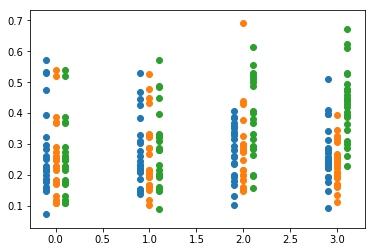

In [33]:
a = [np.mean(x) for x in qbestMSE]
b = [np.mean(x) for x in qbestCOMBO]
c = [np.mean(x) for x in qbestWRONG]
fig = plt.figure()
plt.scatter(np.array(graphDiff) - 0.1, a)
plt.scatter(graphDiff, b)
plt.scatter(np.array(graphDiff) + 0.1, c)

<Figure size 432x288 with 0 Axes>

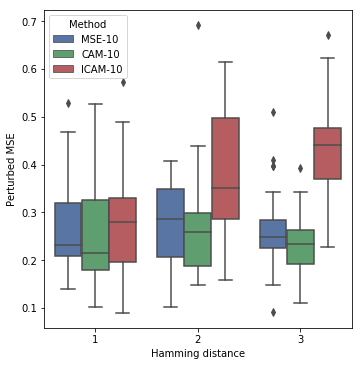

In [34]:
import seaborn as sns

fig = plt.figure()
means = [np.mean(x) for x in qbestMSE]
means1 = [np.mean(x) for x in qbestCOMBO]
means2 = [np.mean(x) for x in qbestWRONG]

temp =  graphDiff.copy() 
diff = []
diff += temp.copy()
diff += temp.copy()
diff += temp.copy()
m = []
m += means
m += means1
m += means2

method = ['MSE-10' for x in graphDiff]
method += ['CAM-10' for x in  graphDiff]
method += ['ICAM-10' for x in  graphDiff]
df = pd.DataFrame(np.array([diff, m, method]).swapaxes(0,1), columns = ['Hamming distance', 'Perturbed MSE', 'Method'])

df['Hamming distance'] = df['Hamming distance'].values.astype(int)
df['Perturbed MSE'] = df['Perturbed MSE'].values.astype(float)
df = df[(df['Hamming distance'] <= 3) & (df['Hamming distance'] > 0)]

fig, ax = plt.subplots()
fig.set_size_inches(5,5)
plt.tight_layout()
ax = sns.boxplot(ax = ax, x='Hamming distance', y='Perturbed MSE', hue='Method', data=df, palette="deep", width = 0.8)
fig.savefig('delete.pdf', bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

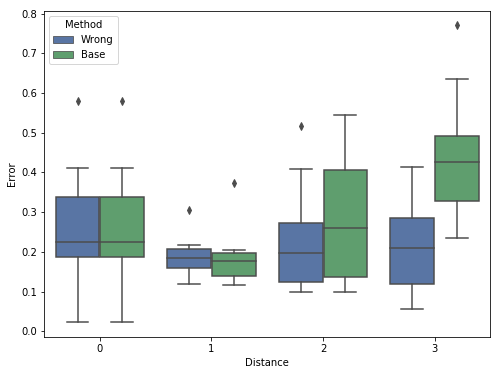

In [59]:
import seaborn as sns
fig = plt.figure()
means = [np.mean(x) for x in bestCOMBO]
means2 = [np.mean(x) for x in bestWRONG]
diff= graphDiff.copy()
diff += diff
means += means2
method = ['Wrong' for x in graphDiff]
method += ['Base' for x in graphDiff]
df = pd.DataFrame(np.array([diff, means, method]).swapaxes(0,1), columns = ['Distance', 'Error', 'Method'])
df['Distance'] = df['Distance'].values.astype(int)
df['Error'] = df['Error'].values.astype(float)
fig, ax = plt.subplots()
fig.set_size_inches(8,6)

ax = sns.boxplot(ax = ax, x='Distance', y='Error', hue='Method', data=df, palette="deep", width = 0.8)

In [22]:
get_bic(causal_df, prior), target

(-4573.456083873683, ['1'])

In [17]:
final.nsmallest(nbest, 'proposed')['generalization'].values, final.nsmallest(nbest, 'wrong')['generalization'].values

(array([0.37032599, 0.02312811]), array([0.62217785, 0.52826288]))

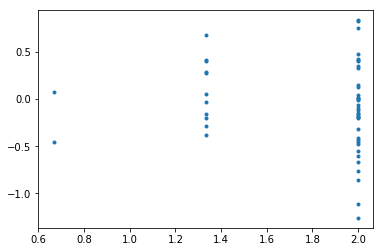

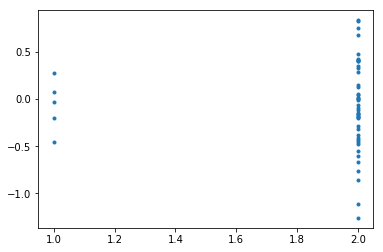

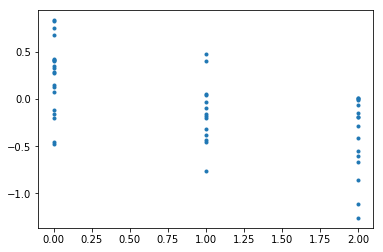

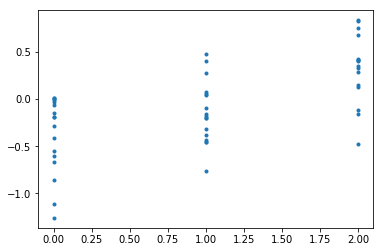

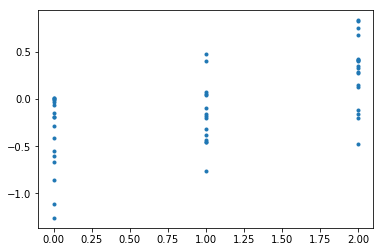

In [15]:
def get_average_improvement(df1, df2):
    ret = []
    for i, j in zip(df1,df2):
        ret.append(np.sum(j) - np.sum(i))
    return ret

improvement = get_average_improvement(bestMSE, bestCOMBO)
np.mean(improvement), np.std(improvement)


fig, ax = plt.subplots()
ax.plot(averageDegree,improvement, '.')
plt.show()


fig, ax = plt.subplots()
ax.plot(targetDegree,improvement, '.')
plt.show()


fig, ax = plt.subplots()
ax.plot(target_inD,improvement, '.')
plt.show()

fig, ax = plt.subplots()
ax.plot(target_outD,improvement, '.')
plt.show()

fig, ax = plt.subplots()
ax.plot(descendants,improvement, '.')
plt.show()

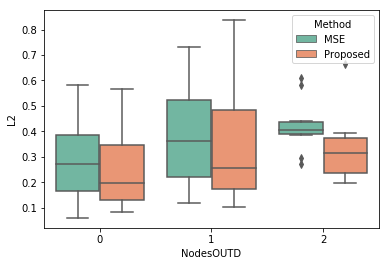

In [8]:
lst = []
for x,y in zip(qbestMSE, descendants):
    lst.append(['MSE', np.mean(x), y])
for x,y in zip(qbestCOMBO, descendants):
    lst.append(['Proposed', np.mean(x), y])


df = pd.DataFrame(lst, columns = ['Method', 'L2', 'NodesOUTD'])
ax = sns.boxplot(data=df, x = 'NodesOUTD', y = 'L2', hue = 'Method', linewidth = 1.5,palette="Set2")

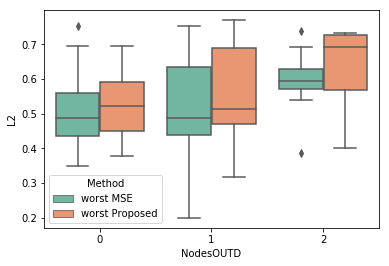

In [7]:
lst = []

for x,y in zip(qworstMSE, descendants):
    lst.append(['worst MSE', np.mean(x), y])
for x,y in zip(qworstCOMBO, descendants):
    lst.append(['worst Proposed', np.mean(x), y])


df = pd.DataFrame(lst, columns = ['Method', 'L2', 'NodesOUTD'])
ax = sns.boxplot(data=df, x = 'NodesOUTD', y = 'L2', hue = 'Method', linewidth = 1.5,palette="Set2")

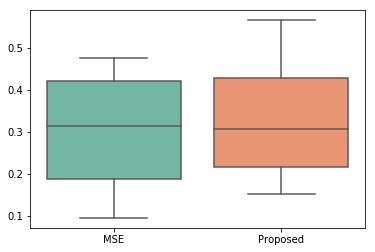

In [19]:
import seaborn as sns
val1 = []
for each in sqbestMSE:
    val1.append(np.mean(each))
val2 = []
for each in sqbestCOMBO:
    val2.append(np.mean(each))

val = []
for x, y in zip(val1, val2):
    val.append([x, y])
df = pd.DataFrame(val, columns = ['MSE', 'Proposed'])
ax = sns.boxplot(data=df, palette="Set2")

[array([0.34256871, 0.10663857, 0.09186131, 0.13797952, 0.20476418,
        0.40354851, 0.24174   , 0.24235948, 0.33555666, 0.16837143,
        0.08600409, 0.37627392, 0.22151405, 0.27901176, 0.36701037]),
 array([0.09783573, 0.02610134, 0.05134069, 0.09422428, 0.0825563 ,
        0.04325446, 0.13610671, 0.        , 0.12345362, 0.22827844,
        0.05973745, 0.12942945, 0.13869404, 0.04872379, 0.15460558]),
 array([0.46735796, 0.50003948, 0.51380424, 0.35769674, 0.31889914,
        0.44269849, 0.07020787, 0.16572479, 0.17748798, 0.47826021,
        0.48642533, 0.2989791 , 0.        , 0.23853813, 0.51485845]),
 array([0.17647893, 0.33605952, 0.48845065, 0.43934111, 0.19819117,
        0.20491931, 0.        , 0.31252612, 0.35613212, 0.22955042,
        0.27876071, 0.2615574 , 0.319779  , 0.16935695, 0.28696008]),
 array([0.14838034, 0.        , 0.30666657, 0.50170137, 0.38342102,
        0.47764567, 0.6573094 , 0.93431778, 0.27928854, 0.22829314,
        0.66568267, 0.56133329, 0.628629

array([ 0.0034327 , -0.02559248, -0.13416377, -0.28205571,  0.05900715,
       -0.10903223,  0.2575864 ,  0.09371263, -0.30997229,  0.06285865,
       -0.04113317, -0.28456472, -0.15928204,  0.27316155,  0.56710605,
        0.55499861,  0.15069201,  0.08087676, -0.41550277,  0.06934814,
       -0.37002946,  0.20243078,  0.32295185,  0.21044946, -0.06087649,
       -0.07757568,  0.43419254, -0.16565832, -0.54071483,  0.1115466 ,
        0.00396973,  0.32194001, -0.42890713, -0.04492837, -0.08022409,
        0.30079676, -0.02563958,  0.01746376, -0.27542297,  0.24730838,
        0.22839099, -0.0525733 ,  0.06003491,  0.19578927, -0.20614404,
        0.15330721,  0.06472666, -0.03574063,  0.35898603, -0.42787733])

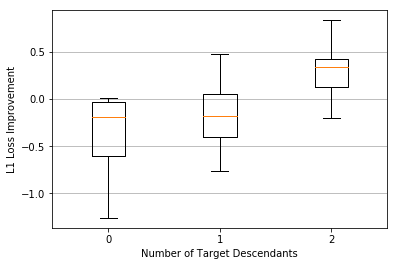

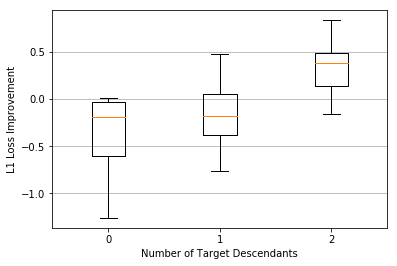

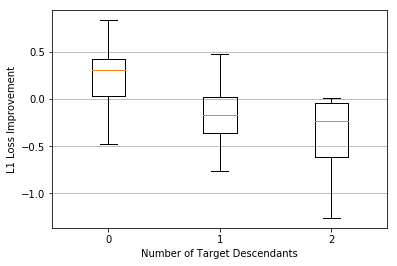

In [16]:
def box_plots(X,Y):
    box = []
    for i in np.unique(X):
        box.append([])
    for x,y in zip(X, Y):
        box[x].append(y)
    fig = plt.figure()

    ax = fig.add_subplot(111)
    ax.yaxis.grid(True)
    ax.set_xlabel("Number of Target Descendants")
    ax.set_ylabel("L1 Loss Improvement")
    bp = ax.boxplot(box, showfliers=False, labels = ['0', '1', '2'])
    
box_plots(descendants, improvement)
box_plots(target_outD, improvement)
box_plots(target_inD, improvement)

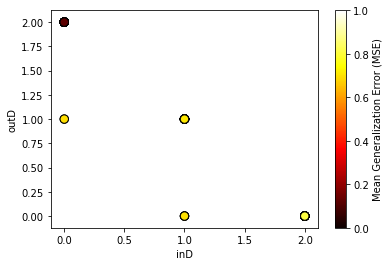

In [45]:
def heat_plot(x,y,z, xlab = 'Mean', ylab = 'Variance', zlab= 'Mean Generalization Error (MSE)', clim_low = 0, clim_high = 1):
    fig, ax = plt.subplots()

    cax = ax.scatter(x, y, c=z, s=70, edgecolor='black', cmap = 'hot')
    cax.set_clim(clim_low, clim_high)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    #plt.colorbar(cax)
    cbar = plt.colorbar(cax)
    cbar.set_label(zlab)
    plt.show()
    

heat_plot(target_outD, target_inD, normalize(improvement), xlab = 'inD', ylab='outD')

In [ ]:
np.mean(bestMSE), np.mean(bestCOMBO), np.std(bestMSE), np.std(bestCOMBO)

In [ ]:
improvement
fig, ax = plt.subplots()
ax.plot(averageDegree,improvement, '.')
plt.show()

improvement
fig, ax = plt.subplots()
ax.plot(targetDegree,improvement, '.')
plt.show()

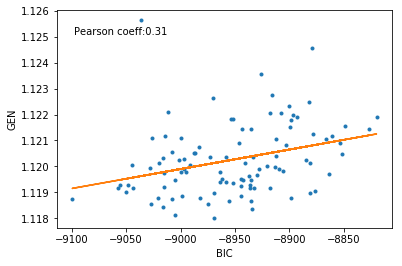

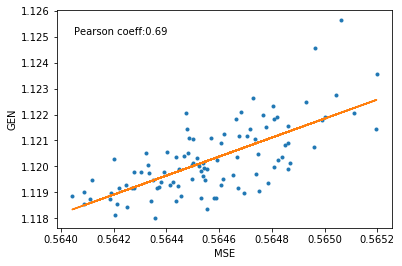

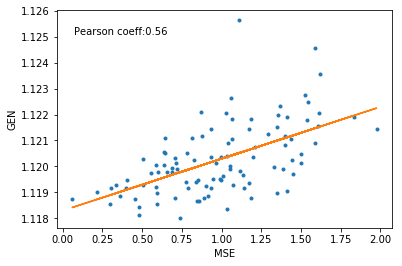

In [11]:
fig, ax = plt.subplots()
b,m = polyfit(proposed,generalization, 1)
text(0.05, 0.9,'Pearson coeff:' + str(pearsonr(proposed,generalization)[0])[0:4], ha='left', va='center', transform=ax.transAxes)
ax.plot(proposed,generalization, '.')
plt.plot(proposed, b + m * np.array(proposed), '-')
ax.set_xlabel("BIC")
ax.set_ylabel("GEN")
fig.savefig('Ex4MSEVsAUS.pdf', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots()
b,m = polyfit(metrics,generalization, 1)
text(0.05, 0.9,'Pearson coeff:' + str(pearsonr(metrics,generalization)[0])[0:4], ha='left', va='center', transform=ax.transAxes)
ax.plot(metrics,generalization, '.')
plt.plot(metrics, b + m * np.array(metrics), '-')
ax.set_xlabel("MSE")
ax.set_ylabel("GEN")
fig.savefig('Ex4MSEVsAUS.pdf', bbox_inches='tight')
plt.show()


total = normalize(metrics) + normalize(proposed)
fig, ax = plt.subplots()
b,m = polyfit(total,generalization, 1)
text(0.05, 0.9,'Pearson coeff:' + str(pearsonr(total,generalization)[0])[0:4], ha='left', va='center', transform=ax.transAxes)
ax.plot(total,generalization, '.')
plt.plot(total, b + m * np.array(total), '-')
ax.set_xlabel("MSE")
ax.set_ylabel("GEN")
fig.savefig('Ex4MSEVsAUS.pdf', bbox_inches='tight')
plt.show()


In [ ]:
nbest = 10
final = pd.DataFrame(np.stack((metrics, proposed, total, generalization), axis = 1), columns = ['metrics', 'proposed', 'combined', 'generalization'])
print("MSE = ", np.sum(final.nsmallest(nbest, 'metrics')['generalization']))
print("BIC = ", np.sum(final.nsmallest(nbest, 'proposed')['generalization']))
print("COMB = ",np.sum(final.nsmallest(nbest, 'combined')['generalization']))